# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [8]:
df.shape

(50000, 14)

In [9]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

**No NA values, that is great!**

In [10]:
df["trip_type"].value_counts().index


Index(['RoundTrip', 'OneWay', 'CircleTrip'], dtype='object')

In [11]:
round_trip = df.trip_type.value_counts().values[0]/ df.trip_type.count() *100
one_way = df.trip_type.value_counts().values[1]/ df.trip_type.count() *100
circle_trip = df.trip_type.value_counts().values[2]/ df.trip_type.count() *100


print(f"Proportion of Round Trip type: {round_trip}%")
print(f"Proportion of One Way type: {one_way}%")
print(f"Proportion of Circle Trip type: {circle_trip}%")


Proportion of Round Trip type: 98.994%
Proportion of One Way type: 0.774%
Proportion of Circle Trip type: 0.232%


In [12]:
df["sales_channel"].value_counts().index

Index(['Internet', 'Mobile'], dtype='object')

In [13]:
internet = df.sales_channel.value_counts().values[0]/ df.sales_channel.count() *100
mobile = df.sales_channel.value_counts().values[1]/ df.sales_channel.count() *100

print(f"{internet}% of sales were done through the Internet")
print(f"{mobile}% of sales were done through the Mobile")


88.764% of sales were done through the Internet
11.236% of sales were done through the Mobile


In [14]:
df["flight_day"].value_counts().index

Int64Index([1, 3, 2, 4, 5, 7, 6], dtype='int64')

In [15]:
monday = df.flight_day.value_counts().values[0]/ df.flight_day.count() *100
tuesday = df.flight_day.value_counts().values[2]/ df.flight_day.count() *100
wednesday = df.flight_day.value_counts().values[1]/ df.flight_day.count() *100
thursday = df.flight_day.value_counts().values[3]/ df.flight_day.count() *100
friday = df.flight_day.value_counts().values[4]/ df.flight_day.count() *100
saturday = df.flight_day.value_counts().values[6]/ df.flight_day.count() *100
sunday = df.flight_day.value_counts().values[5]/ df.flight_day.count() *100

print(f"{monday}% of flights were on Monday")
print(f"{tuesday:.3f}% of flights were on Tuesday")
print(f"{wednesday}% of flights were on Wednesday")
print(f"{thursday}% of flights were on Thursday")
print(f"{friday}% of flights were on Friday")
print(f"{saturday:.3f}% of flights were on Saturday")
print(f"{sunday}% of flights were on Sunday")

16.204% of flights were on Monday
15.346% of flights were on Tuesday
15.348% of flights were on Wednesday
14.848% of flights were on Thursday
13.522% of flights were on Friday
11.624% of flights were on Saturday
13.108% of flights were on Sunday


In [16]:
df["wants_extra_baggage"].value_counts().index

Int64Index([1, 0], dtype='int64')

In [17]:
wants_eb = df.wants_extra_baggage.value_counts().values[0]/ df.wants_extra_baggage.count() *100
not_wants_eb = df.wants_extra_baggage.value_counts().values[1]/ df.wants_extra_baggage.count() *100

print(f"{wants_eb}% of passengers wants extra baggage")
print(f"{not_wants_eb}% of passengers doesn't want extra baggage")

66.878% of passengers wants extra baggage
33.122% of passengers doesn't want extra baggage


In [18]:
df["wants_preferred_seat"].value_counts().index

Int64Index([0, 1], dtype='int64')

In [19]:
wants_ps = df.wants_preferred_seat.value_counts().values[1]/ df.wants_preferred_seat.count() *100
not_wants_ps = df.wants_preferred_seat.value_counts().values[0]/ df.wants_preferred_seat.count() *100

print(f"{wants_ps}% of passengers wants preferred seat")
print(f"{not_wants_ps}% of passengers doesn't want preferred seat")

29.696% of passengers wants preferred seat
70.304% of passengers doesn't want preferred seat


In [20]:
df["wants_in_flight_meals"].value_counts().index

Int64Index([0, 1], dtype='int64')

In [21]:
wants_fm = df.wants_in_flight_meals.value_counts().values[1]/ df.wants_in_flight_meals.count() *100
not_wants_fm = df.wants_in_flight_meals.value_counts().values[0]/ df.wants_in_flight_meals.count() *100

print(f"{wants_fm}% of passengers wants flight meal")
print(f"{not_wants_fm}% of passengers doesn't want flight meal")

42.714% of passengers wants flight meal
57.286% of passengers doesn't want flight meal


In [22]:
df["booking_complete"].value_counts().index

Int64Index([0, 1], dtype='int64')

In [23]:
completed = df.booking_complete.value_counts().values[1]/ df.booking_complete.count() *100
not_completed = df.booking_complete.value_counts().values[0]/ df.booking_complete.count() *100

print(f"Only {completed}% of bookings are completed")
print(f"While {not_completed}% of bookings are not completed")

Only 14.956% of bookings are completed
While 85.044% of bookings are not completed


In [24]:
country_count = df["booking_origin"].nunique()

print(f"Flights are booked from {country_count} different countries")

Flights are booked from 104 different countries


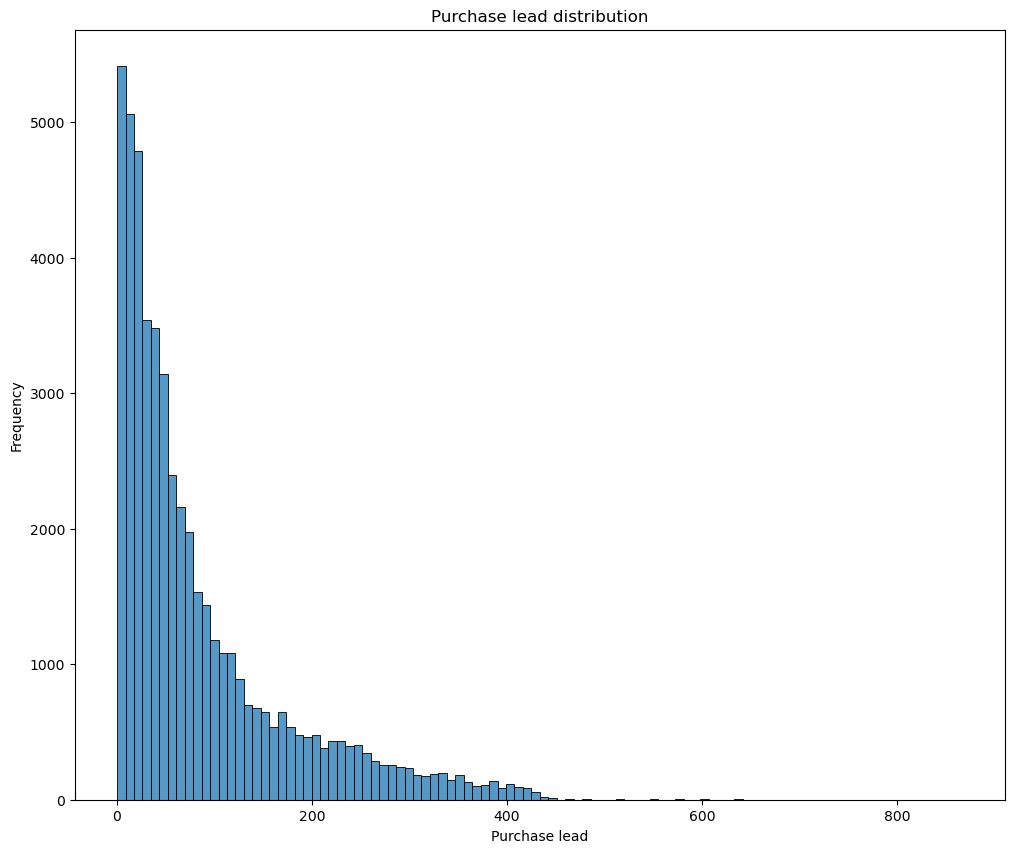

In [25]:
plt.figure(figsize=(12, 10))

sns.histplot(df["purchase_lead"], kde=False, bins=100)  
plt.xlabel("Purchase lead")  
plt.ylabel("Frequency")  
plt.title("Purchase lead distribution") 

plt.show()

**From the histogram we can see that some people booked one year in advance. However, majority of customers did it only several days before the flight**

In [26]:
(df.purchase_lead > 365).value_counts()

False    49162
True       838
Name: purchase_lead, dtype: int64

In [27]:
portion_of_one_year_before = (838 / 49162) * 100

print(f"{portion_of_one_year_before:.3f}% of customers booked one year in advance:)")

1.705% of customers booked one year in advance:)


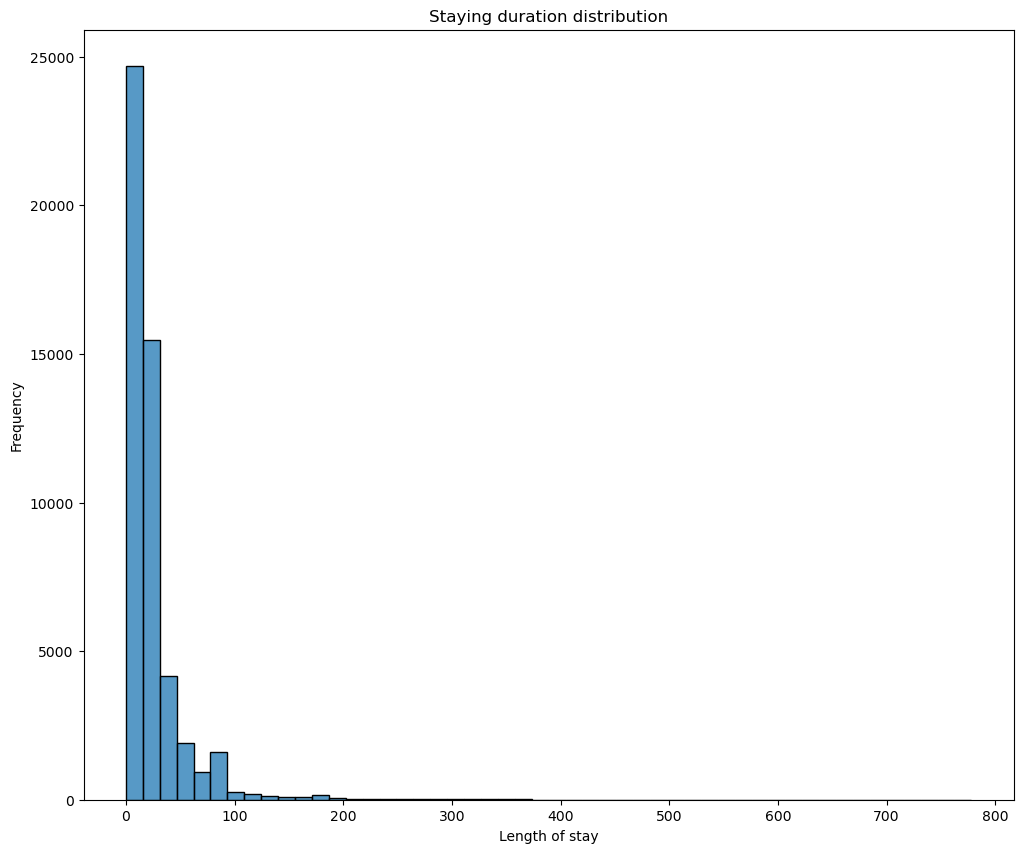

In [28]:
plt.figure(figsize=(12, 10))

sns.histplot(df["length_of_stay"], kde=False, bins=50)  
plt.xlabel("Length of stay")  
plt.ylabel("Frequency")  
plt.title("Staying duration distribution") 

plt.show()

**Here also, from the histogram we can see most of the people stayed only for few days, but, still we have ones who stayed more than a month**

Let's see how many of them we have

In [29]:
(df.length_of_stay > 30).value_counts()

False    39501
True     10499
Name: length_of_stay, dtype: int64

More than one fifth of people

In [30]:
max_count = df["booking_origin"].value_counts().max()
max_origin_name = df["booking_origin"].value_counts()[df["booking_origin"].value_counts() == max_count].index.tolist()

print(f"Our max bookings are from {max_origin_name} which is {max_count}")

Our max bookings are from ['Australia'] which is 17872


In [31]:
min_count = df["booking_origin"].value_counts().min()
min_origin_name = df["booking_origin"].value_counts()[df["booking_origin"].value_counts() == min_count].index.tolist()

print(f"Our min bookings are from {min_origin_name} which is {min_count}")

Our min bookings are from ['Vanuatu', 'Czechia', 'Malta', 'Gibraltar', 'Belarus', 'Pakistan', 'Iraq', 'Ghana', 'Seychelles', 'Guatemala', 'Algeria', 'Afghanistan', 'Lebanon', 'Estonia', 'Paraguay', 'Papua New Guinea', 'Jordan', 'Egypt', 'Nicaragua', 'Slovakia', 'Norfolk Island', 'Bhutan', 'Panama', 'Tonga', 'Tanzania', 'Bulgaria', 'Svalbard & Jan Mayen'] which is 1


Now, let's see top 10 countries by number of bookings

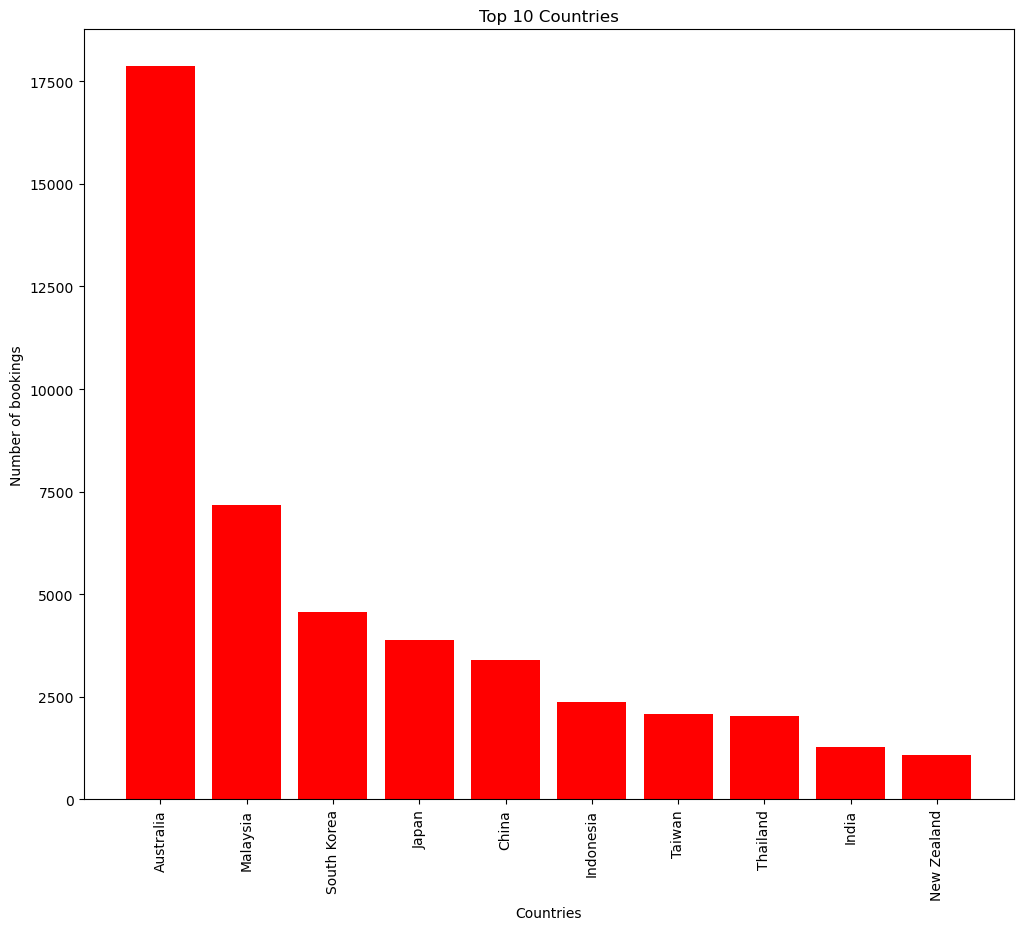

In [32]:
plt.figure(figsize=(12, 10))

country_counts = df["booking_origin"].value_counts().head(10)

plt.bar(country_counts.index, country_counts.values, color='red')
plt.xlabel("Countries")
plt.ylabel("Number of bookings")
plt.title("Top 10 Countries")
plt.xticks(rotation=90)

plt.show()

In [33]:
df.to_csv("data/customer_booking_filtered.csv")